In [1]:
# Initial imports
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
# Loading data
df = pd.read_csv(Path("crypto_data.csv"))
df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


Data Cleaning

In [3]:
# drop unwanted columns 
df.drop('CoinName', axis=1, inplace=True)

In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
# drop unwanted rows
df[df["IsTrading"].astype(str).str.contains("False")==False]


,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,True,PoW/PoS,4.199995e+01,42
1,X11,True,PoW/PoS,NaN,2300000000
2,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,SHA-256,True,PoW,NaN,611000
4,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...
1243,Ethash,True,PoW,NaN,1000000000
1244,SHA-256,True,DPoI,NaN,1000000000
1245,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,Equihash,True,PoW,7.296538e+06,21000000


In [6]:
df.dropna()

,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,True,PoW/PoS,4.199995e+01,42
2,Scrypt,True,PoW/PoS,1.055185e+09,532000000
4,SHA-256,True,PoW/PoS,0.000000e+00,0
5,X13,True,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,True,PoW,1.792718e+07,21000000
...,...,...,...,...,...
1242,Scrypt,True,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,Equihash,True,PoW,7.296538e+06,21000000
1247,Scrypt,True,PoS,1.283270e+05,1000000


In [7]:
df.drop('IsTrading', axis=1, inplace=True)

In [8]:
# filter by greater than zero coins mined
crytpo_df = df.loc[df['TotalCoinsMined']>0]

In [9]:
crytpo_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000
1247,Scrypt,PoS,1.283270e+05,1000000


In [10]:
# take a look at data before making it binary
crytpo_df['Algorithm'].unique()

array(['Scrypt', 'X13', 'SHA-256', 'Ethash', 'X11', 'CryptoNight-V7',
       'Equihash', 'SHA-512', 'Multiple', 'X15', 'Quark', 'Groestl',
       'PoS', 'NeoScrypt', 'SHA3', 'HybridScryptHash256', 'PHI1612',
       'Lyra2REv2', 'CryptoNight', 'Shabal256', 'Counterparty',
       'Stanford Folding', 'QuBit', 'M7 POW', 'Lyra2RE', 'QUAIT',
       'Blake2b', 'BLAKE256', '1GB AES Pattern Search', 'NIST5', 'Dagger',
       'X11GOST', 'ScryptOG', 'POS 3.0', 'SHA-256D', 'Lyra2Z', 'X14',
       'DPoS', 'Dagger-Hashimoto', 'Blake2S', '536', 'Argon2d',
       'Cloverhash', 'Skein', 'Time Travel', 'Keccak',
       'SkunkHash v2 Raptor', 'VeChainThor Authority', 'Ouroboros',
       'POS 2.0', 'C11', 'SkunkHash', 'Proof-of-BibleHash',
       'SHA-256 + Hive', 'Proof-of-Authority', 'XEVAN', 'VBFT', 'IMesh',
       'Green Protocol', 'Semux BFT consensus', 'X16R', 'Tribus',
       'CryptoNight Heavy', 'Jump Consistent Hash', 'HMQ1725',
       'Cryptonight-GPU', 'ECC 256K1', 'Blake', 'Exosis',
       'Eq

In [11]:
crytpo_df['ProofType'].unique()

array(['PoW/PoS', 'PoW', 'PoS', 'PoC', 'PoS/PoW/PoT', 'PoST', 'PoW/nPoS',
       'PoS/PoW', 'dPoW/PoW', 'PoW/PoW', 'DPoS', 'TPoS', 'PoW/PoS ',
       'Proof of Authority', 'PoW and PoS', 'POBh', 'PoW + Hive', 'PoA',
       'HPoW', 'Zero-Knowledge Proof', 'DPOS', 'Pos', 'Proof of Trust',
       'LPoS', 'DPoW', 'PoS/LPoS'], dtype=object)

In [12]:
# create dummy variables for categorical variables
crytpo_dummy = pd.get_dummies(crytpo_df, columns=['Algorithm', 'ProofType'], dummy_na=True)

In [13]:
crytpo_dummy

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW,ProofType_nan
0,4.199995e+01,42,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1242,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1247,1.283270e+05,1000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# Scale the data
scaler = StandardScaler().fit_transform(crytpo_dummy)
scaler

array([[-0.11450078, -0.15072489, -0.04166667, ..., -0.04166667,
        -0.04166667,  0.        ],
       [-0.09041991, -0.14255828, -0.04166667, ..., -0.04166667,
        -0.04166667,  0.        ],
       [ 0.55369883,  4.67185916, -0.04166667, ..., -0.04166667,
        -0.04166667,  0.        ],
       ...,
       [-0.11433426, -0.15040252, -0.04166667, ..., -0.04166667,
        -0.04166667,  0.        ],
       [-0.11449785, -0.15070954, -0.04166667, ..., -0.04166667,
        -0.04166667,  0.        ],
       [-0.11401032, -0.14918981, -0.04166667, ..., -0.04166667,
        -0.04166667,  0.        ]])

In [15]:
# Initialize PCA model
pca = PCA(n_components = 0.99)

pca

PCA(n_components=0.99)

In [16]:
# Get principal components for the data.

crypto_pca = pca.fit_transform(scaler)
crypto_pca

array([[-3.25873467e-01,  1.13989379e+00, -5.58793131e-01, ...,
        -1.72436971e-01, -5.92741065e-04, -1.06939536e-01],
       [-3.08532273e-01,  1.14012328e+00, -5.59207977e-01, ...,
        -1.72322590e-01, -8.00096833e-04, -1.06681047e-01],
       [ 2.42049045e+00,  1.71779871e+00, -6.35945634e-01, ...,
        -3.85369069e-01, -2.44964501e-02,  1.55694633e-01],
       ...,
       [-1.50690337e-01, -2.07676698e+00,  3.80761010e-01, ...,
        -4.86747194e-01, -5.56248149e-01,  3.72705949e-02],
       [-2.79988707e-01,  7.92128764e-01, -2.56735735e-01, ...,
         1.48214694e-01, -1.34846575e+00, -4.21152492e-01],
       [-3.24864062e-01,  1.13985756e+00, -5.58810407e-01, ...,
        -1.72547854e-01, -7.52483338e-04, -1.06924079e-01]])

In [17]:
crypto_pca_df = pd.DataFrame(data=crypto_pca)
crypto_pca_df


,0,1,2,3,4,5,6,7,8,9,...,79,80,81,82,83,84,85,86,87,88
0,-0.325873,1.139894,-0.558793,0.001330,5.249146e-14,3.643847e-14,-1.981960e-14,-0.013586,-1.228595,-0.061216,...,1.574267e-14,-0.674858,0.201051,0.156244,0.530373,0.302234,-0.301478,-0.172437,-0.000593,-0.106940
1,-0.308532,1.140123,-0.559208,0.001318,5.379043e-14,3.774321e-14,-1.864998e-14,-0.014233,-1.231987,-0.064990,...,1.659569e-14,-0.674859,0.201074,0.156192,0.530237,0.302124,-0.301437,-0.172323,-0.000800,-0.106681
2,2.420490,1.717799,-0.635946,0.004728,8.820332e-14,5.926196e-14,-3.043241e-14,-0.064570,-1.575150,-0.732407,...,-4.265106e-13,0.585967,0.434456,0.242594,-0.402205,-0.079425,0.359924,-0.385369,-0.024496,0.155695
3,-0.138908,-1.349133,0.166846,-0.001204,-1.900300e-14,-1.391609e-14,7.523706e-15,0.001798,0.181201,0.226610,...,-5.704449e-14,0.227677,0.177266,0.091919,-0.317894,-0.167307,0.362432,0.049094,0.307580,0.071071
4,-0.135897,-2.110498,0.357371,-0.001688,-3.586228e-14,-2.745877e-14,1.225607e-14,0.033395,0.359324,0.193160,...,-1.234606e-14,0.224030,0.008681,0.307287,0.840918,0.216772,-0.243716,-0.144676,-0.075066,0.036370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,-0.323844,1.139786,-0.558823,0.001332,5.378294e-14,3.757795e-14,-1.883842e-14,-0.013613,-1.229063,-0.061712,...,1.582953e-14,-0.674848,0.201045,0.156230,0.530485,0.302180,-0.301471,-0.172743,-0.001019,-0.106908
573,0.323033,-2.354008,0.374493,-0.001278,-3.887691e-14,-2.676409e-14,1.377578e-14,0.022914,-0.030530,0.042516,...,2.913736e-14,0.165214,-0.005879,-0.047690,0.807963,0.137451,-0.353815,0.019925,-0.178239,-0.039026
574,-0.150690,-2.076767,0.380761,-0.001709,-4.109628e-14,-2.605518e-14,1.477322e-14,0.035645,0.476849,0.258569,...,-7.044298e-16,-0.143619,0.001997,-0.014980,-2.972628,2.937755,-1.867449,-0.486747,-0.556248,0.037271
575,-0.279989,0.792129,-0.256736,0.000479,2.566026e-14,1.837575e-14,-9.123842e-15,-0.024881,0.962765,-0.736184,...,1.241250e-15,-0.605871,0.262703,-0.604088,-0.242315,-0.708854,-0.060231,0.148215,-1.348466,-0.421152


In [18]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([0.02708105, 0.02067072, 0.01990277, 0.01983637, 0.01983636,
       0.01983636, 0.01983636, 0.01981545, 0.01793603, 0.01699956,
       0.01685121, 0.015789  , 0.01503468, 0.01428098, 0.01398908,
       0.01370283, 0.0120177 , 0.0116892 , 0.01068992, 0.01038572,
       0.01017478, 0.01011304, 0.01010378, 0.0100661 , 0.0100465 ,
       0.01003429, 0.01000455, 0.00998757, 0.00998672, 0.00998093,
       0.00997749, 0.00997116, 0.00997011, 0.00997011, 0.00996863,
       0.00995964, 0.00995322, 0.00994947, 0.00994517, 0.00994236,
       0.00993881, 0.00993566, 0.00993543, 0.00993543, 0.00993543,
       0.0099346 , 0.00993005, 0.00992887, 0.00992531, 0.00991925,
       0.00991818, 0.00991818, 0.00991818, 0.00991818, 0.00991818,
       0.00991818, 0.00991818, 0.00991818, 0.00991818, 0.00991818,
       0.00991818, 0.00991818, 0.00991818, 0.00991818, 0.00991818,
       0.00991818, 0.00991818, 0.00991818, 0.00991818, 0.00991818,
       0.00991818, 0.00991818, 0.00991818, 0.00991818, 0.00991

In [19]:
# Run t-SNE
tsne = TSNE(learning_rate=250)
tsne_features = tsne.fit_transform(crypto_pca_df)

In [20]:
# Check that dimensions have been reduced to two
tsne_features.shape

(577, 2)

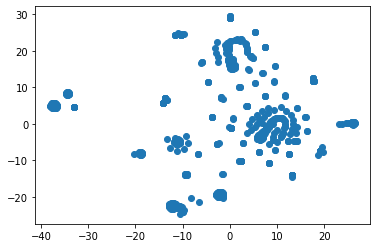

In [21]:
# Plot the results
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

In [25]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(crypto_pca_df)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,57800.309873
1,2,56643.522538
2,3,55846.755090
3,4,54122.556284
4,5,53284.795541


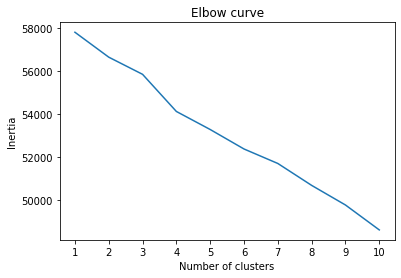

In [26]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve')
plt.show()

There are still 577 cryptocurriencies that are being traded. While there isn't strong leveling out, the line does vaguely shift at 3 number of clusters. Three number of clusters might be the ideal number.